<a href="https://colab.research.google.com/github/rehanmehdichandio/Dilwali_Sales/blob/main/Diwali_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/diwali_sales.xlsx')

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.dtypes

,0
User_ID,int64
Cust_name,object
Product_ID,object
Gender,object
Age Group,object
Age,int64
Marital_Status,int64
State,object
Zone,object
Occupation,object


In [ ]:
#remove column 'unnamed1' from df
df = df.drop(['unnamed1'], axis=1)

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status'],
      dtype='object')

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN


In [ ]:
df.shape

(11251, 14)

In [ ]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df = df.drop(['Status'], axis=1)

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#fill null values of Amount column with its mean()
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [ ]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


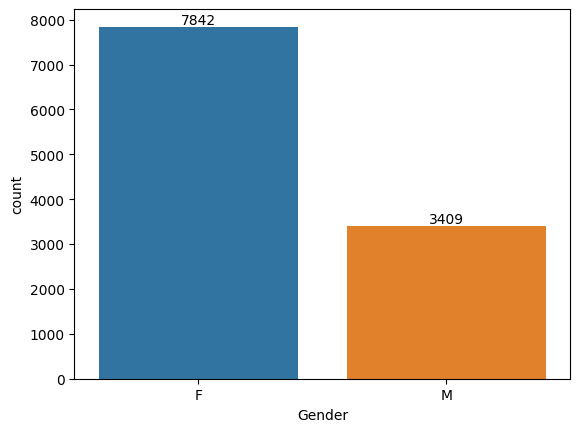

In [ ]:
ax = sns.countplot(x='Gender', data=df, hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)


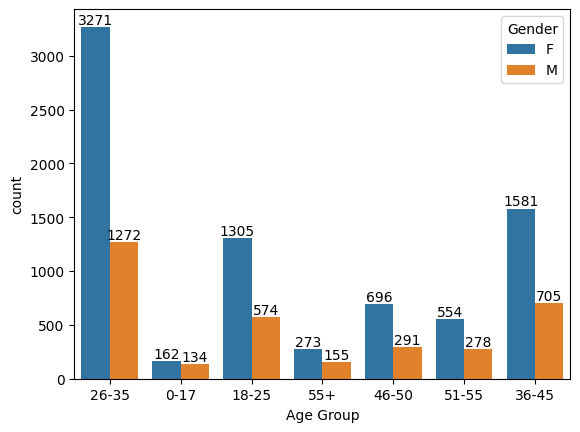

In [ ]:
ax = sns.countplot(x='Age Group', data=df, hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

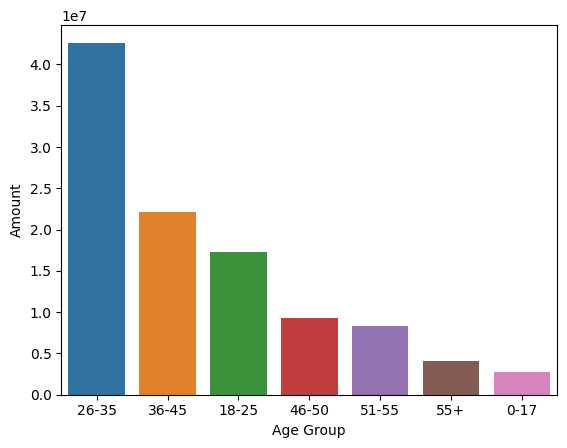

In [ ]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, hue='Age Group')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

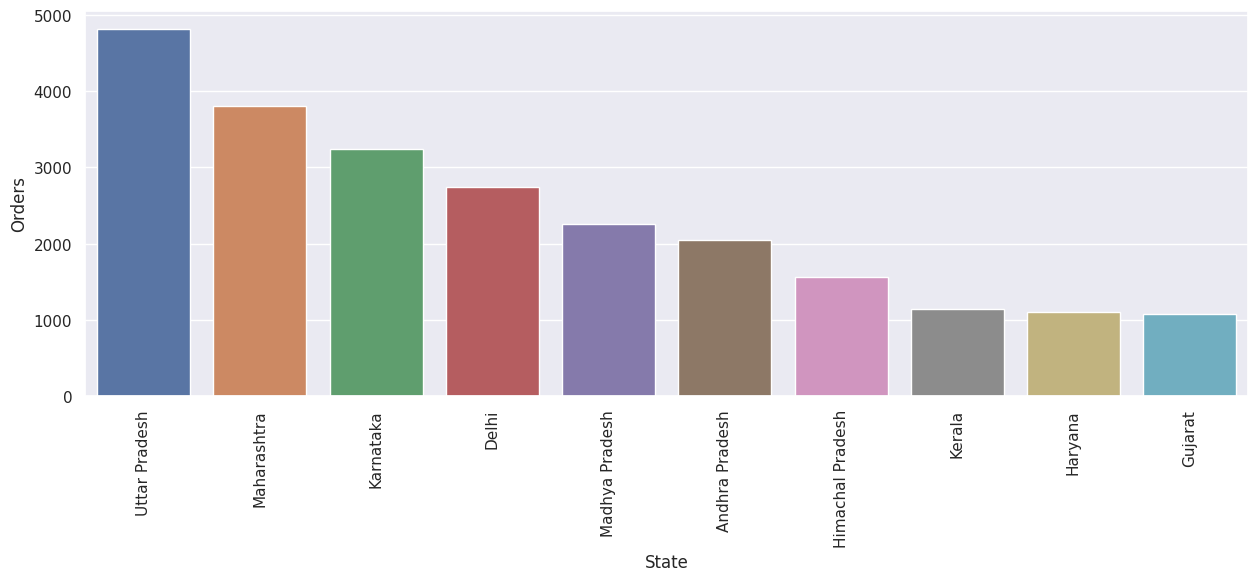

In [ ]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders', hue = 'State')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

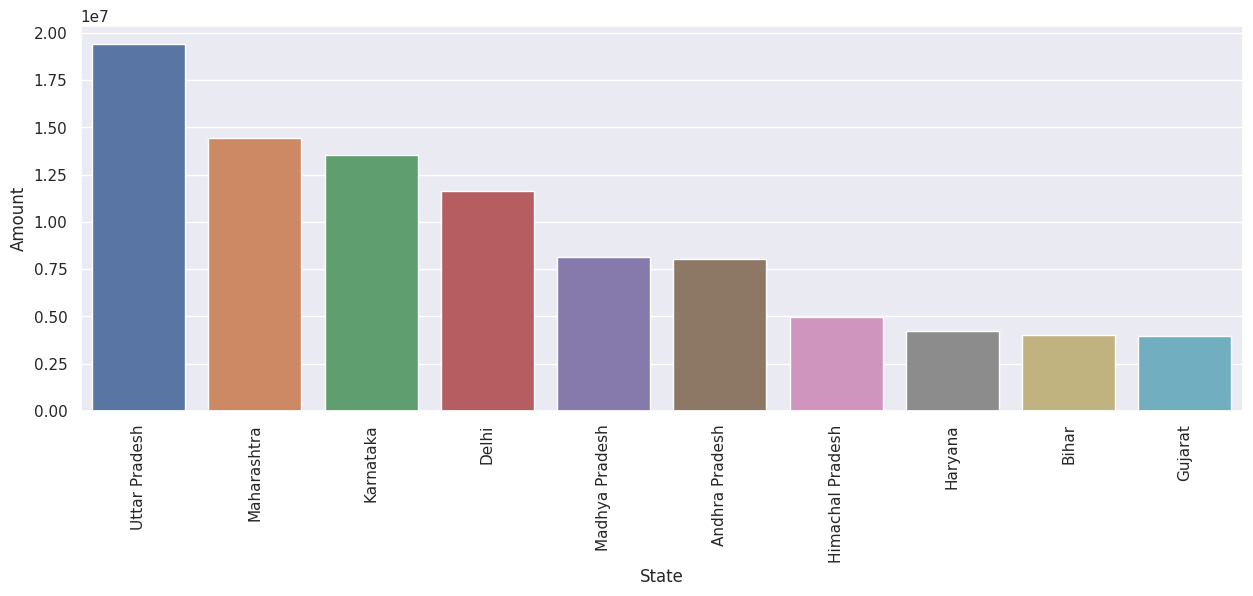

In [ ]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount', hue = 'State')
plt.xticks(rotation=90)

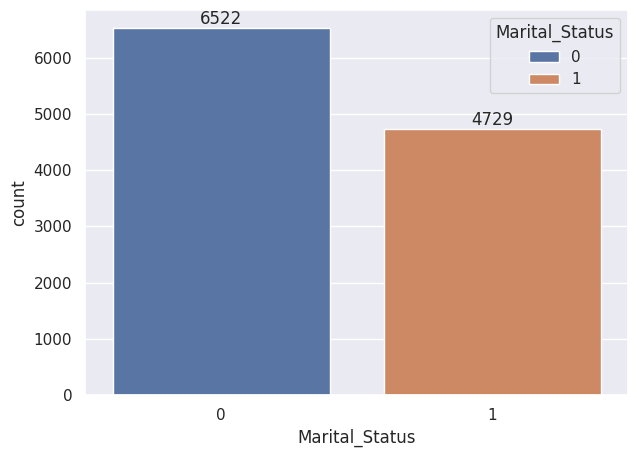

In [ ]:
ax = sns.countplot(data=df, x="Marital_Status", hue='Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
  ax.bar_label(bars)

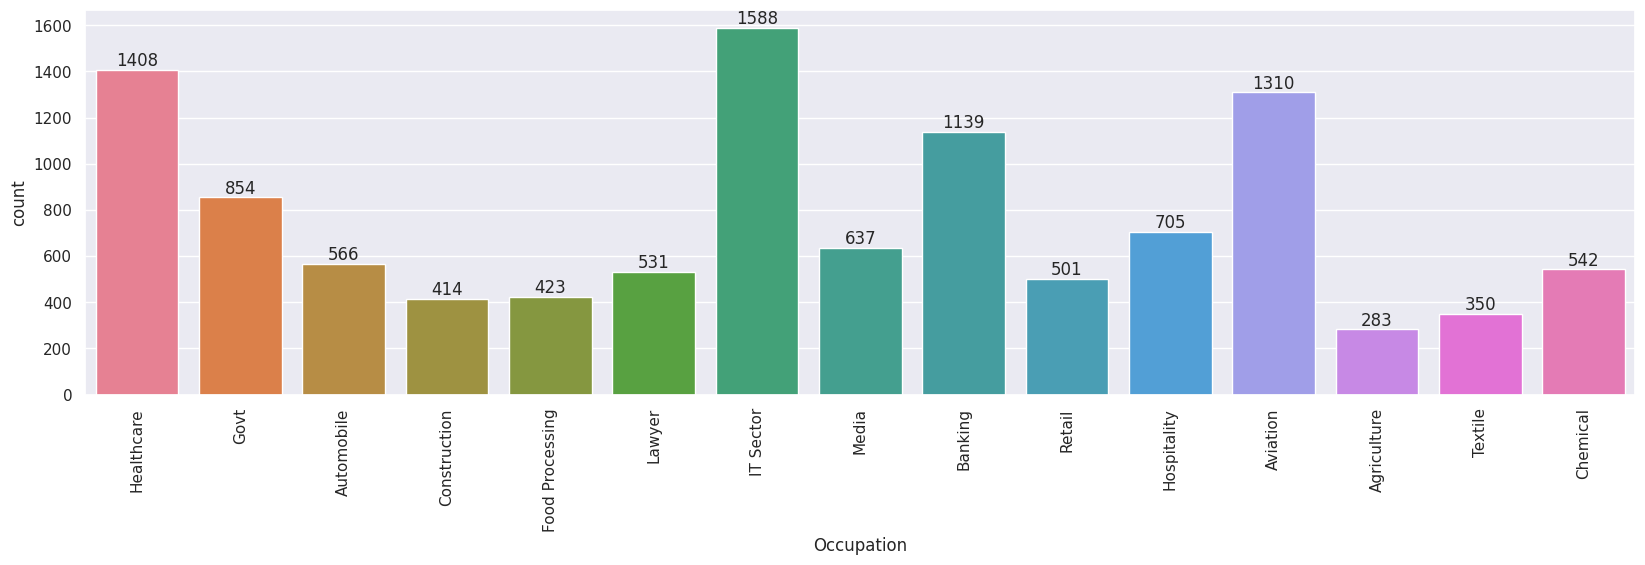

In [ ]:
ax = sns.countplot(data=df, x="Occupation", hue='Occupation')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
  ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Auto'),
  Text(8, 0, 'Beauty'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

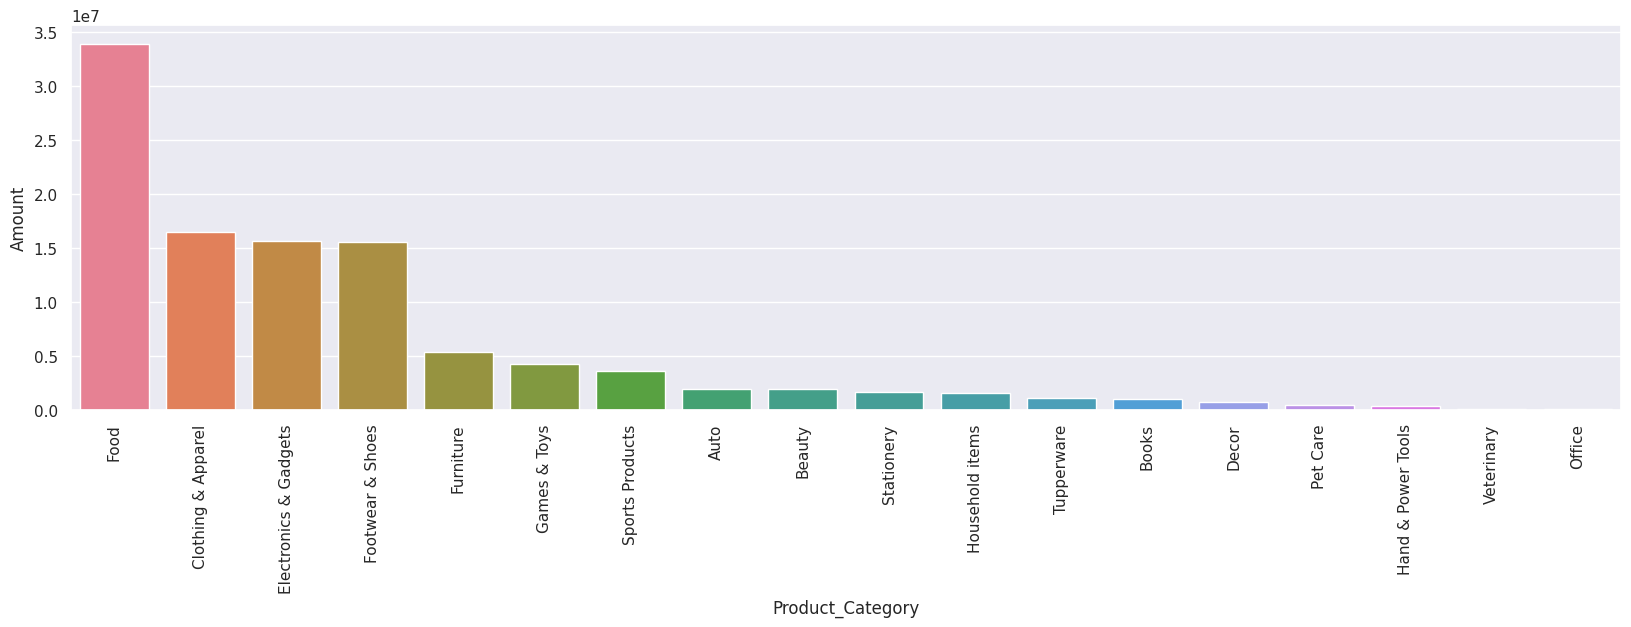

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount', hue = 'Product_Category')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

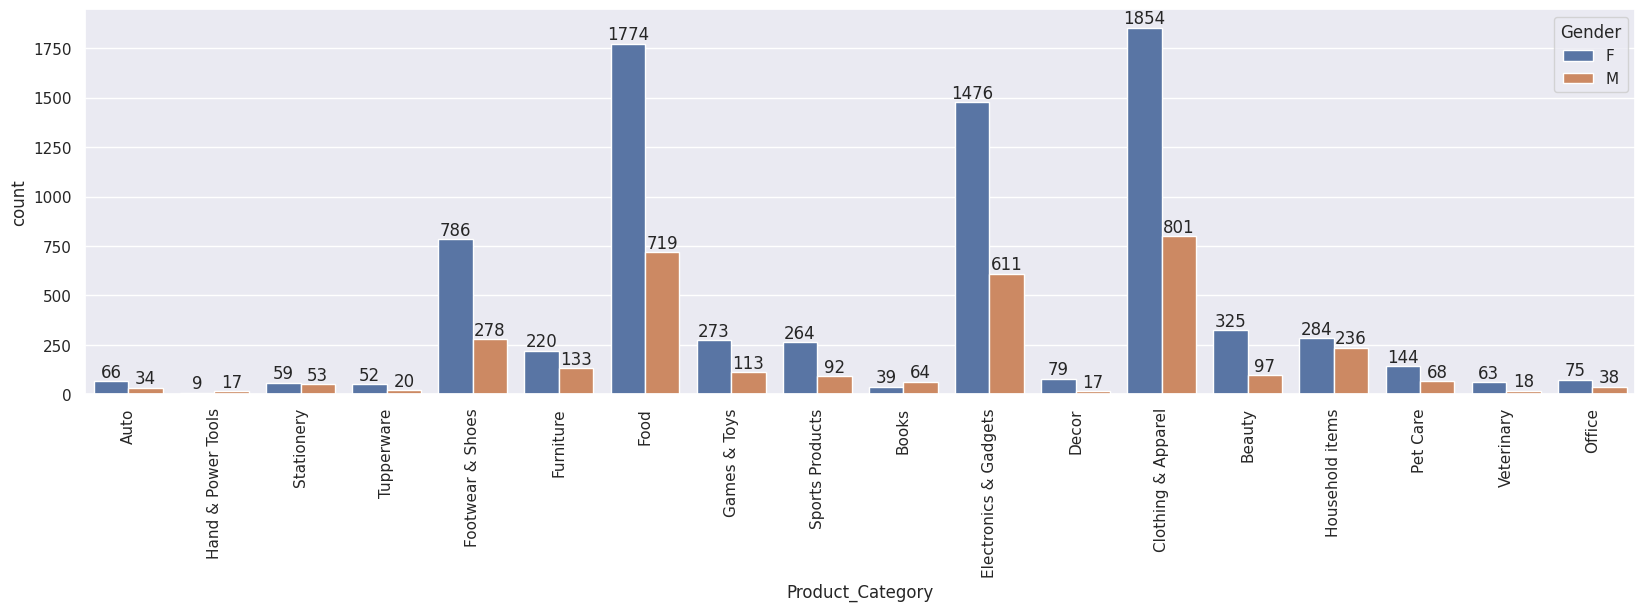

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x="Product_Category", hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)
plt.xticks(rotation=90)

<Axes: xlabel='Product_ID'>

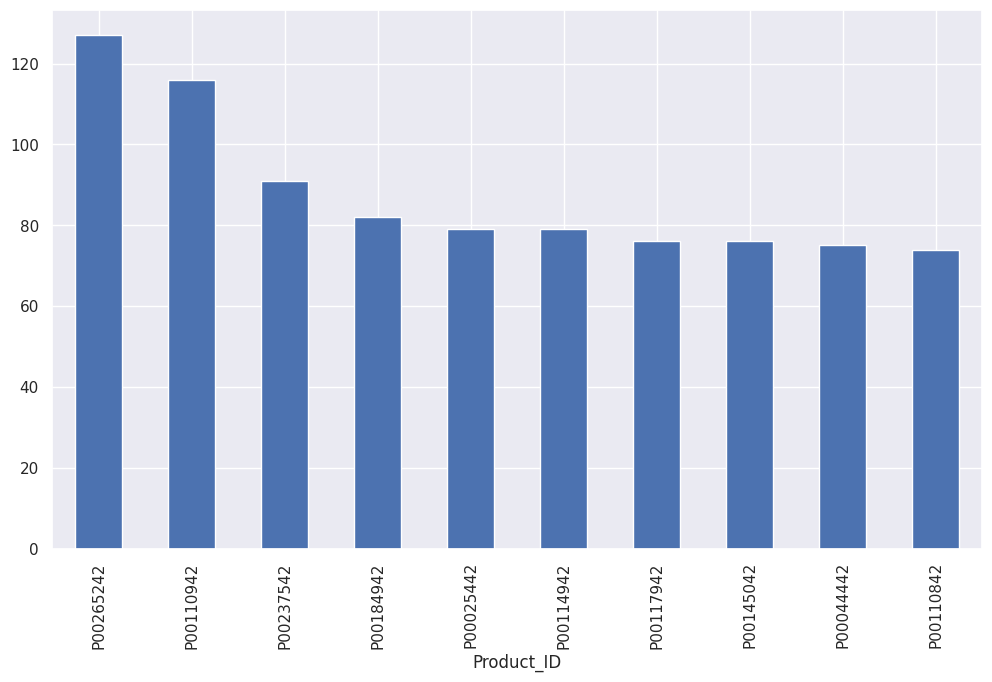

In [ ]:
fig, ax1 =plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
